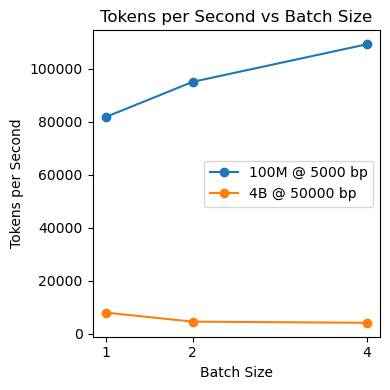

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSVs
df_100m = pd.read_csv("")
df_4b = pd.read_csv("")

# Filter for target bp values
df_100m_sel = df_100m[df_100m["condition"].str.contains("5000")]
df_4b_sel = df_4b[df_4b["condition"].str.contains("50000")]

# Ensure numeric sorting of batch size
df_100m_sel = df_100m_sel.sort_values("batch_size")
df_4b_sel = df_4b_sel.sort_values("batch_size")

# ---- Plot: Tokens per Second ----
plt.figure(figsize=(4,4))

# Plot both models
plt.plot(df_100m_sel["batch_size"], df_100m_sel["tokens_per_s"],
         marker="o", label="100M @ 5000 bp")

plt.plot(df_4b_sel["batch_size"], df_4b_sel["tokens_per_s"],
         marker="o", label="4B @ 50000 bp")

# Log scale for y-axis
#plt.yscale("log")

# Custom y-ticks
plt.xticks([1, 2, 4], labels=["1", "2", "4"])

# Labels and title
plt.xlabel("Batch Size")
plt.ylabel("Tokens per Second")
plt.title("Tokens per Second vs Batch Size")

plt.legend()
plt.tight_layout()
# plt.show()   # <- keep commented for now

In [15]:
df_100m

,model,commit,gpu_name,driver,cuda,torch,precision,condition,mean_bp,mean_tokens,...,seqs_per_s,tokens_per_s,peak_vram_GB,energy_kWh,avg_power_W,flops_per_seq,TFLOPs_per_s,eff_seq_per_TFLOP,eff_tokens_per_TFLOP,tokens_per_watt
0,DOEJGI/GenomeOcean-100M,NaN,NVIDIA A40,545.23.08\n545.23.08\n545.23.08\n545.23.08,12.1,2.4.0+cu121,float16,bp=2500,2500,513,...,94.0516,48251.97,0.487,0.000747,252.93,77478166628,7.287,1213.911565,6.227815e+05,190.775552
1,DOEJGI/GenomeOcean-100M,NaN,NVIDIA A40,545.23.08\n545.23.08\n545.23.08\n545.23.08,12.1,2.4.0+cu121,float16,bp=2500,2500,513,...,160.9037,82549.55,0.570,0.000437,253.00,77478166628,12.467,2076.761880,1.065456e+06,326.287707
2,DOEJGI/GenomeOcean-100M,NaN,NVIDIA A40,545.23.08\n545.23.08\n545.23.08\n545.23.08,12.1,2.4.0+cu121,float16,bp=2500,2500,513,...,216.7601,111205.95,0.721,0.000323,251.96,77478166628,16.794,2797.692566,1.435320e+06,441.367514
3,DOEJGI/GenomeOcean-100M,NaN,NVIDIA A40,545.23.08\n545.23.08\n545.23.08\n545.23.08,12.1,2.4.0+cu121,float16,bp=5000,5000,1023,...,79.7631,81674.24,0.721,0.000882,253.24,164296389943,13.105,485.483071,4.971152e+05,322.520097
4,DOEJGI/GenomeOcean-100M,NaN,NVIDIA A40,545.23.08\n545.23.08\n545.23.08\n545.23.08,12.1,2.4.0+cu121,float16,bp=5000,5000,1023,...,92.7473,94969.54,0.801,0.000750,250.52,164296389943,15.238,564.512162,5.780379e+05,379.086863
5,DOEJGI/GenomeOcean-100M,NaN,NVIDIA A40,545.23.08\n545.23.08\n545.23.08\n545.23.08,12.1,2.4.0+cu121,float16,bp=5000,5000,1023,...,106.5997,109153.83,1.235,0.000657,252.16,164296389943,17.514,648.825613,6.643715e+05,432.883172


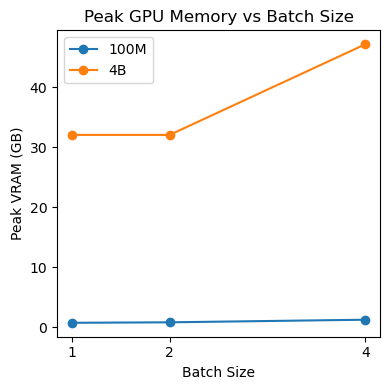

In [21]:
# ---- Plot 2: Peak Memory ----
plt.figure(figsize=(4,4))
plt.plot(df_100m_sel["batch_size"], df_100m_sel["peak_vram_GB"], marker="o", label="100M")
plt.plot(df_4b_sel["batch_size"], df_4b_sel["peak_vram_GB"], marker="o", label="4B")
plt.xlabel("Batch Size")
plt.ylabel("Peak VRAM (GB)")
plt.title("Peak GPU Memory vs Batch Size")
plt.xticks([1, 2, 4], labels=["1", "2", "4"])
plt.legend()
plt.tight_layout()
plt.show()

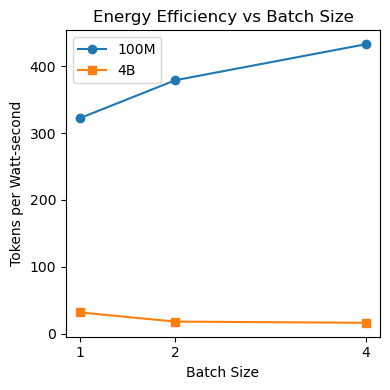

In [22]:
# ---- Plot 3: Tokens per Watt ----
plt.figure(figsize=(4,4))
plt.plot(df_100m_sel["batch_size"], df_100m_sel["tokens_per_watt"], marker="o", label="100M")
plt.plot(df_4b_sel["batch_size"], df_4b_sel["tokens_per_watt"], marker="s", label="4B")
plt.xlabel("Batch Size")
plt.ylabel("Tokens per Watt-second")
plt.title("Energy Efficiency vs Batch Size")
plt.xticks([1, 2, 4], labels=["1", "2", "4"])
plt.legend()
plt.tight_layout()
plt.show()